## Section 0

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

## Section 1.0

In [ ]:
dataset001 = pd.read_csv('27000.csv')
dataset002 = pd.read_csv('27500.csv')
dataset003 = pd.read_csv('27700.csv')
dataset004 = pd.read_csv('28200.csv')
dataset005 = pd.read_csv('28400.csv')
dataset006 = pd.read_csv('28800.csv')
dataset007 = pd.read_csv('29200.csv')
dataset008 = pd.read_csv('29500.csv')
dataset009 = pd.read_csv('29700.csv')

In [ ]:
print(dataset009['Email Type'].value_counts())

Email Type
Benign      243
Phishing     46
Unknown      11
Name: count, dtype: int64


In [ ]:
total_dataset = pd.concat([dataset001, dataset002, dataset003, dataset004, dataset005, dataset006, dataset007, dataset008, dataset009], ignore_index=True)
prediction_dataset = total_dataset.copy()

In [ ]:
prediction_dataset

,Email Type,Brand Name,Brand Category,Explanation
0,Benign,WSCC (World Security Corporation),Training Provider,- The email content is related to the cancella...
1,Benign,NaN,NaN,The email appears to be a simple and personal ...
2,Benign,Names,academic journal,This email appears to be legitimate and benign...
3,Phishing,FallDear,Unknown,Average URL length: The URL included in the em...
4,Benign,Python-Dev,Python Development Community,The email content pertains to a discussion abo...
...,...,...,...,...
2995,Phishing,National Lottery,Lottery,"* The email contains a large sum of money won,..."
2996,Benign,OpenSUSE,Linux Distribution,The email does not contain any suspicious link...
2997,Benign,VIA EPIA,Hardware,* Email Type: The email content does not conta...
2998,Benign,"Postfix, dkim-milter","Email Systems, Technology","Email type is determined as Benign, based on t..."


In [ ]:
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].str.replace('Benign</s>', 'Benign')
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].str.replace('Benigan', 'Benign')
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].str.replace('benign', 'Benign')
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].str.replace('phishing', 'Phishing')
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].str.replace('unknown', 'Unknown')

In [ ]:
# describe dataset
prediction_dataset.describe()

,Email Type,Brand Name,Brand Category,Explanation
count,3000,2463,2511,2997
unique,3,1666,1216,2997
top,Benign,Unknown,Unknown,- The email content is related to the cancella...
freq,2420,95,117,1


In [ ]:
print(prediction_dataset['Email Type'].value_counts())

Email Type
Benign      2420
Phishing     449
Unknown      131
Name: count, dtype: int64


In [ ]:
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].replace({'Benign': 0})
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].replace({'Phishing': 1})
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].replace({'Unknown': -1})

In [ ]:
prediction_dataset['Email Type'] = prediction_dataset['Email Type'].astype(int)

In [ ]:
print(prediction_dataset['Email Type'].value_counts())

Email Type
 0    2420
 1     449
-1     131
Name: count, dtype: int64


In [ ]:
prediction_dataset

,Email Type,Brand Name,Brand Category,Explanation
0,0,WSCC (World Security Corporation),Training Provider,- The email content is related to the cancella...
1,0,NaN,NaN,The email appears to be a simple and personal ...
2,0,Names,academic journal,This email appears to be legitimate and benign...
3,1,FallDear,Unknown,Average URL length: The URL included in the em...
4,0,Python-Dev,Python Development Community,The email content pertains to a discussion abo...
...,...,...,...,...
2995,1,National Lottery,Lottery,"* The email contains a large sum of money won,..."
2996,0,OpenSUSE,Linux Distribution,The email does not contain any suspicious link...
2997,0,VIA EPIA,Hardware,* Email Type: The email content does not conta...
2998,0,"Postfix, dkim-milter","Email Systems, Technology","Email type is determined as Benign, based on t..."


In [ ]:
prediction_dataset_name = 'prediction_27000_30000.csv'
prediction_dataset.to_csv(prediction_dataset_name, index=False)

## Section 1.1

In [ ]:
dataset_1 = pd.read_csv('prediction_0_3000.csv')
dataset_2 = pd.read_csv('prediction_3000_6000.csv')
dataset_3 = pd.read_csv('prediction_6000_9000.csv')
dataset_4 = pd.read_csv('prediction_9000_12000.csv')
dataset_5 = pd.read_csv('prediction_12000_15000.csv')
dataset_6 = pd.read_csv('prediction_15000_18000.csv')
dataset_7 = pd.read_csv('prediction_18000_21000.csv')
dataset_8 = pd.read_csv('prediction_21000_24000.csv')
dataset_9 = pd.read_csv('prediction_24000_27000.csv')
dataset_10 = pd.read_csv('prediction_27000_30000.csv')

In [ ]:
total_dataset = pd.concat([dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, dataset_6, dataset_7, dataset_8, dataset_9, dataset_10], ignore_index=True)
prediction_dataset = total_dataset.copy()

In [ ]:
prediction_dataset

,Email Type,Brand Name,Brand Category,Explanation
0,0,Python,Software,The email does not contain any suspicious link...
1,0,Sabra Dinari (Individual),Personal,* The email appears to be from an individual n...
2,0,Not applicable,Not applicable,The new input does not contain any phishing li...
3,1,Replica Classics,Counterfeit Goods,URL Belong to Top Website: False - The URL in ...
4,0,"Enron, TDS, Grid","Energy Company, Project Management",The email does not contain any suspicious link...
...,...,...,...,...
29995,1,National Lottery,Lottery,"* The email contains a large sum of money won,..."
29996,0,OpenSUSE,Linux Distribution,The email does not contain any suspicious link...
29997,0,VIA EPIA,Hardware,* Email Type: The email content does not conta...
29998,0,"Postfix, dkim-milter","Email Systems, Technology","Email type is determined as Benign, based on t..."


In [ ]:
# describe dataset
prediction_dataset.describe()

,Email Type
count,30000.000000
mean,0.107867
std,0.434785
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
print(prediction_dataset['Email Type'].value_counts())

Email Type
 0    23980
 1     4628
-1     1392
Name: count, dtype: int64


In [ ]:
prediction_dataset_name = 'total_prediction.csv'
prediction_dataset.to_csv(prediction_dataset_name, index=False)

## Section 2


In [ ]:
# Import Dataset 1

# data path
data_path = '/content/final_dataset.csv'

# read a csv file
label_dataset = pd.read_csv(data_path)

# display
label_dataset

,subject,body,subject_length,body_length,special_symbol_number,average_word_length,url_average_length,is_top_website,is_dga,sentiment_score,...,num_authority,num_urgency,num_curiosity,num_familiarity,num_emotional,num_sensitive,num_social_proof,subject_entropy,body_entropy,label
0,Re: [Python-3000] [Python-Dev] Reminder: last ...,"On 01:55 am, hoauf@python.org wrote:\n>On Thu,...",79,12215,184,4.91,63.5,False,False,Positive,...,74,6,10,2,17,0,0,4.68,4.63,0
1,terminated employees ' benefits,"happy new year all ,\r\ni have been with enron...",31,1670,7,3.80,0.0,True,False,Positive,...,2,2,4,1,2,1,0,3.76,4.17,0
2,"9/11, war in Iraq threaten Disney parks",URL: http://boingboing.net/#85531557\nDate: No...,39,1044,12,6.76,58.0,False,False,Positive,...,0,0,2,1,1,0,0,4.03,4.89,0
3,"If you want a decent watch, get a replica appr...",\nQualitative watches at Replica Classics \n\n...,58,187,0,6.04,25.0,False,False,Positive,...,0,0,0,0,0,0,0,3.88,4.43,1
4,re : tds project,"you might hear of this , so i thought i better...",16,6807,98,3.71,0.0,True,False,Positive,...,15,5,2,0,7,0,0,3.33,4.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39921,caiso notification - tswg conference call,please call in @ 1330 pacific . call in number...,41,84,4,3.42,0.0,True,False,Positive,...,0,0,0,0,0,0,0,3.71,4.42,0
39922,[UAI] Ph.D Positions in Bioinformatics at Joha...,Ph.D Positions in Bioinformatics\n\nTwo PhD po...,82,2000,11,6.24,0.0,True,False,Positive,...,4,1,1,0,2,0,0,4.45,4.64,0
39923,happy holidays !,with the holiday season and a new year upon us...,16,386,0,4.11,0.0,True,False,Positive,...,0,0,2,1,2,0,0,3.38,4.16,0
39924,Re: [opensuse] Screen Capture,"Chris Arnold wrote:\n> On 10.3, how do i get a...",29,591,11,4.63,0.0,True,False,Negative,...,0,0,1,0,1,0,0,3.81,4.63,0


In [ ]:
small_label_dataset = label_dataset.iloc[:30000, 20:]

In [ ]:
print(small_label_dataset.shape)
print(prediction_dataset.shape)

(30000, 1)
(30000, 4)


In [ ]:
print(small_label_dataset['label'].value_counts())

label
0    24046
1     5954
Name: count, dtype: int64


In [ ]:
print(prediction_dataset['Email Type'].value_counts())

Email Type
 0    23980
 1     4628
-1     1392
Name: count, dtype: int64


## Section 3

In [ ]:
labels = small_label_dataset['label'].values
predictions = prediction_dataset['Email Type'].values

In [ ]:
print(labels)
print(predictions)
print(len(labels))
print(len(predictions))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
30000
30000


### Section 3.0.1: Case 1

In [ ]:
predictions_with_unknown_as_error = np.where(predictions == -1, 1 - labels, predictions)

# 计算评价指标
accuracy1 = accuracy_score(labels, predictions_with_unknown_as_error)
precision1 = precision_score(labels, predictions_with_unknown_as_error, pos_label=1)
recall1 = recall_score(labels, predictions_with_unknown_as_error, pos_label=1)
f1_1 = f1_score(labels, predictions_with_unknown_as_error, pos_label=1)

# 处理二元标签
lb = LabelBinarizer()
lb.fit(labels)
labels_binary = lb.transform(labels)
predictions_binary = lb.transform(predictions_with_unknown_as_error)

if labels_binary.shape[1] == 1:
    labels_binary = np.hstack((1 - labels_binary, labels_binary))
    predictions_binary = np.hstack((1 - predictions_binary, predictions_binary))

auc_roc1 = roc_auc_score(labels_binary, predictions_binary)


print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Classification Report:")
print(classification_report(labels, predictions_with_unknown_as_error))

 0: Benign
 1: Phishing
-1: Unknown




Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     24046
           1       0.78      0.70      0.73      5954

    accuracy                           0.90     30000
   macro avg       0.85      0.82      0.84     30000
weighted avg       0.90      0.90      0.90     30000



 0: Benign
 1: Phishing
-1: Unknown




Confusion Matrix:


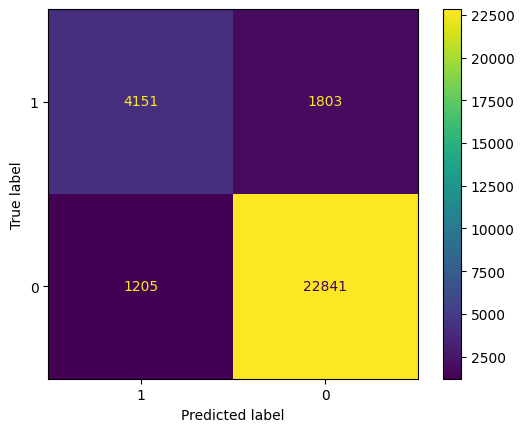

In [ ]:
print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Confusion Matrix:")
matrix = confusion_matrix(labels, predictions_with_unknown_as_error, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()

In [ ]:
# Some important evaluation matrics summary

print("Evaluation 1 (Unknown as Error):")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"AUC-ROC: {auc_roc1:.2f}")

Evaluation 1 (Unknown as Error):
Accuracy: 0.90
Precision: 0.78
Recall: 0.70
F1 Score: 0.73
AUC-ROC: 0.82


### Section 3.0.2: Case 2

In [ ]:
valid_indices = predictions != -1
valid_labels = labels[valid_indices]
valid_predictions = predictions[valid_indices]

# 计算评价指标
accuracy2 = accuracy_score(valid_labels, valid_predictions)
precision2 = precision_score(valid_labels, valid_predictions, pos_label=1)
recall2 = recall_score(valid_labels, valid_predictions, pos_label=1)
f1_2 = f1_score(valid_labels, valid_predictions, pos_label=1)

# 处理二元标签
lb = LabelBinarizer()
lb.fit(valid_labels)
valid_labels_binary = lb.transform(valid_labels)
valid_predictions_binary = lb.transform(valid_predictions)

if valid_labels_binary.shape[1] == 1:
    valid_labels_binary = np.hstack((1 - valid_labels_binary, valid_labels_binary))
    valid_predictions_binary = np.hstack((1 - valid_predictions_binary, valid_predictions_binary))

auc_roc2 = roc_auc_score(valid_labels_binary, valid_predictions_binary)

print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Classification Report:")
print(classification_report(valid_labels, valid_predictions))

 0: Benign
 1: Phishing
-1: Unknown




Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23318
           1       0.90      0.78      0.84      5290

    accuracy                           0.94     28608
   macro avg       0.92      0.88      0.90     28608
weighted avg       0.94      0.94      0.94     28608



 0: Benign
 1: Phishing
-1: Unknown




Confusion Matrix:


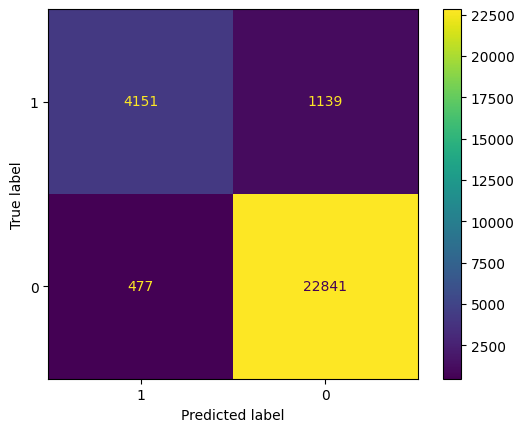

In [ ]:
print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Confusion Matrix:")
matrix = confusion_matrix(valid_labels, valid_predictions, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()

In [ ]:
# Some important evaluation matrics summary

print("Evaluation 2 (Ignoring Unknown):")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1 Score: {f1_2:.2f}")
print(f"AUC-ROC: {auc_roc2:.2f}")

Evaluation 2 (Ignoring Unknown):
Accuracy: 0.94
Precision: 0.90
Recall: 0.78
F1 Score: 0.84
AUC-ROC: 0.88


### Section 3.0.3: Case 3

In [ ]:
predictions_with_unknown_as_phishing = np.where(predictions == -1, 1, predictions)

# 计算评价指标
accuracy3 = accuracy_score(labels, predictions_with_unknown_as_phishing)
precision3 = precision_score(labels, predictions_with_unknown_as_phishing, pos_label=1)
recall3 = recall_score(labels, predictions_with_unknown_as_phishing, pos_label=1)
f1_3 = f1_score(labels, predictions_with_unknown_as_phishing, pos_label=1)

# 处理二元标签
lb = LabelBinarizer()
lb.fit(labels)
labels_binary = lb.transform(labels)
predictions_binary_phishing = lb.transform(predictions_with_unknown_as_phishing)

if predictions_binary_phishing.shape[1] == 1:
    labels_binary = np.hstack((1 - labels_binary, labels_binary))
    predictions_binary_phishing = np.hstack((1 - predictions_binary_phishing, predictions_binary_phishing))

auc_roc3 = roc_auc_score(labels_binary, predictions_binary_phishing)

print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Classification Report:")
print(classification_report(labels, predictions_with_unknown_as_phishing))

 0: Benign
 1: Phishing
-1: Unknown




Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     24046
           1       0.80      0.81      0.80      5954

    accuracy                           0.92     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.92      0.92      0.92     30000



 0: Benign
 1: Phishing
-1: Unknown




Confusion Matrix:


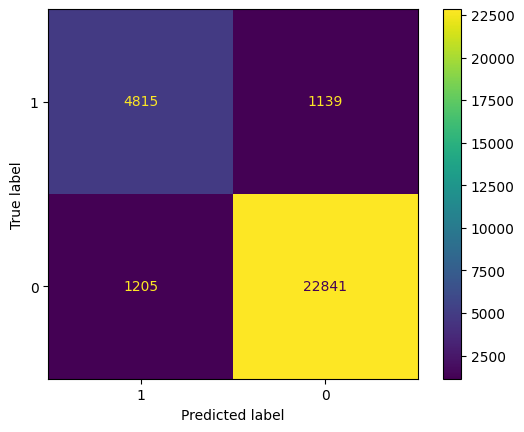

In [ ]:
print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Confusion Matrix:")
matrix = confusion_matrix(labels, predictions_with_unknown_as_phishing, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()

In [ ]:
# Some important evaluation matrics summary

print("Evaluation 3 (Unknown as Phishing):")
print(f"Accuracy: {accuracy3:.2f}")
print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")
print(f"F1 Score: {f1_3:.2f}")
print(f"AUC-ROC: {auc_roc3:.2f}")

Evaluation 3 (Unknown as Phishing):
Accuracy: 0.92
Precision: 0.80
Recall: 0.81
F1 Score: 0.80
AUC-ROC: 0.88


### Section 3.0.4: Case 4

In [ ]:
predictions_with_unknown_as_benign = np.where(predictions == -1, 0, predictions)

# 计算评价指标
accuracy4 = accuracy_score(labels, predictions_with_unknown_as_benign)
precision4 = precision_score(labels, predictions_with_unknown_as_benign, pos_label=1)
recall4 = recall_score(labels, predictions_with_unknown_as_benign, pos_label=1)
f1_4 = f1_score(labels, predictions_with_unknown_as_benign, pos_label=1)

# 处理二元标签
lb = LabelBinarizer()
lb.fit(labels)
labels_binary = lb.transform(labels)
predictions_binary_benign = lb.transform(predictions_with_unknown_as_benign)

if predictions_binary_benign.shape[1] == 1:
    labels_binary = np.hstack((1 - labels_binary, labels_binary))
    predictions_binary_benign = np.hstack((1 - predictions_binary_benign, predictions_binary_benign))

auc_roc4 = roc_auc_score(labels_binary, predictions_binary_benign)

print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Classification Report:")
print(classification_report(labels, predictions_with_unknown_as_phishing))

 0: Benign
 1: Phishing
-1: Unknown




Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     24046
           1       0.80      0.81      0.80      5954

    accuracy                           0.92     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.92      0.92      0.92     30000



 0: Benign
 1: Phishing
-1: Unknown




Confusion Matrix:


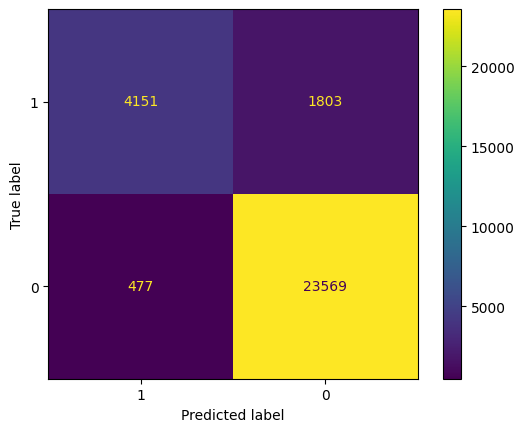

In [ ]:
print(" 0: Benign")
print(" 1: Phishing")
print("-1: Unknown")

print("\n")
print("\n")

print("Confusion Matrix:")
matrix = confusion_matrix(labels, predictions_with_unknown_as_benign, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot()
plt.show()

In [ ]:
# Some important evaluation matrics summary

print("Evaluation 4 (Unknown as Benign):")
print(f"Accuracy: {accuracy4:.2f}")
print(f"Precision: {precision4:.2f}")
print(f"Recall: {recall4:.2f}")
print(f"F1 Score: {f1_4:.2f}")
print(f"AUC-ROC: {auc_roc4:.2f}")

Evaluation 4 (Unknown as Benign):
Accuracy: 0.92
Precision: 0.90
Recall: 0.70
F1 Score: 0.78
AUC-ROC: 0.84


### Section 3.0.5 Check Unknown number

In [ ]:
new_valid_indices = predictions == -1
new_valid_labels = labels[new_valid_indices]

In [ ]:
print(len(new_valid_labels))

1392
